In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

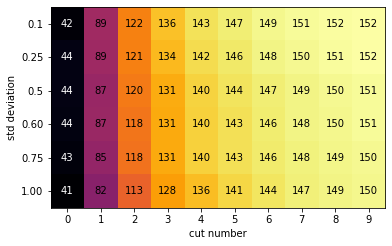

In [3]:
stdev = ['0.1','0.25','0.5','0.60','0.75','1.00']

norm = mpl.colors.Normalize(vmin=30, vmax=160)
# mappable = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')

data = []
for s in stdev:
    exp = []
    for i in range(10):
        df = pd.read_json('experiments/stdev/stdev_'+s+'_results.json').to_numpy()
        # ax1.scatter(np.ones((10))*i, df[:,i], s=50, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
        exp.append(df[:,i].mean())
    data.append(exp)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='inferno')


ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(6))
# ax.set_xticklabels(farmers)
ax.set_yticklabels(stdev)
ax.set_xlabel("cut number")
ax.set_ylabel("std deviation")

for i in range(len(stdev)):
    for j in range(10):
        text = ax.text(j, i, "{:.0f}".format(data[i][j]), ha="center", va="center", color="black" if j>0 else "white")


plt.show()

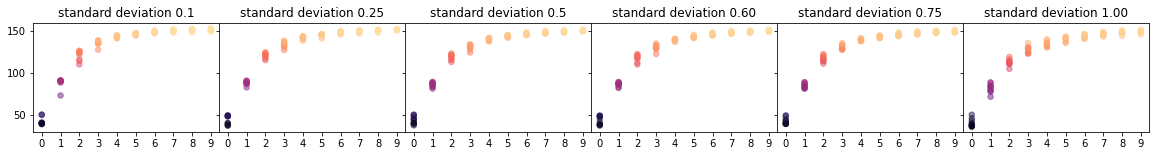

In [18]:
fig = plt.figure(figsize=(20,2))
gs = fig.add_gridspec(1, 6, hspace=0, wspace=0)
axs = gs.subplots(sharey=True)

for l,s in enumerate(stdev):
    axs[l].set_title('standard deviation '+s)
    axs[l].set_xticks(np.arange(10))
    for i in range(10):
        df = pd.read_json('experiments/stdev/stdev_'+s+'_results.json').to_numpy()
        axs[l].scatter(np.ones((10))*i, df[:,i], s=30, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
plt.show()

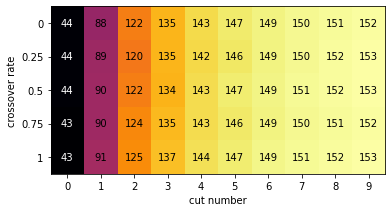

In [5]:
crate = ['0','0.25','0.5','0.75','1']

norm = mpl.colors.Normalize(vmin=30, vmax=160)
# mappable = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')

data = []
for s in crate:
    exp = []
    for i in range(10):
        df = pd.read_json('experiments/cross_rate/cross_rate_'+s+'_results.json').to_numpy()
        # ax1.scatter(np.ones((10))*i, df[:,i], s=50, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
        exp.append(df[:,i].mean())
    data.append(exp)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='inferno')


ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(5))
# ax.set_xticklabels(farmers)
ax.set_yticklabels(crate)
ax.set_xlabel("cut number")
ax.set_ylabel("crossover rate")

for i in range(len(crate)):
    for j in range(10):
        text = ax.text(j, i, "{:.0f}".format(data[i][j]), ha="center", va="center", color="black" if j>0 else "white")

plt.show()

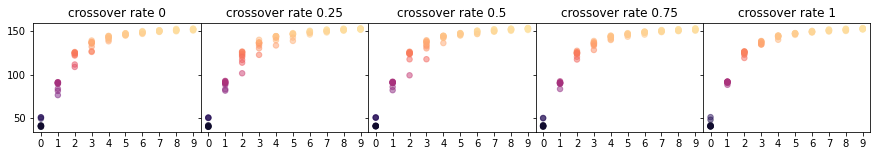

In [24]:
fig = plt.figure(figsize=(15,2))
gs = fig.add_gridspec(1, 5, hspace=0, wspace=0)
axs = gs.subplots(sharey=True)

for l,s in enumerate(crate):
    axs[l].set_title('crossover rate '+s)
    axs[l].set_xticks(np.arange(10))
    for i in range(10):
        df = pd.read_json('experiments/cross_rate/cross_rate_'+s+'_results.json').to_numpy()
        axs[l].scatter(np.ones((10))*i, df[:,i], s=30, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
plt.show()

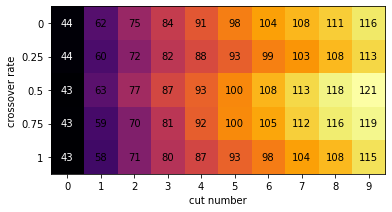

In [7]:
crate = ['0','0.25','0.5','0.75','1']

norm = mpl.colors.Normalize(vmin=30, vmax=160)
# mappable = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')

data = []
for s in crate:
    exp = []
    for i in range(10):
        df = pd.read_json('experiments/no_regeneration/no_regeneration_cross_'+s+'_results.json').to_numpy()
        # ax1.scatter(np.ones((10))*i, df[:,i], s=50, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
        exp.append(df[:,i].mean())
    data.append(exp)

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='inferno')


ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(5))
# ax.set_xticklabels(farmers)
ax.set_yticklabels(crate)
ax.set_xlabel("cut number")
ax.set_ylabel("crossover rate")

for i in range(len(crate)):
    for j in range(10):
        text = ax.text(j, i, "{:.0f}".format(data[i][j]), ha="center", va="center", color="black" if j>0 else "white")

plt.show()

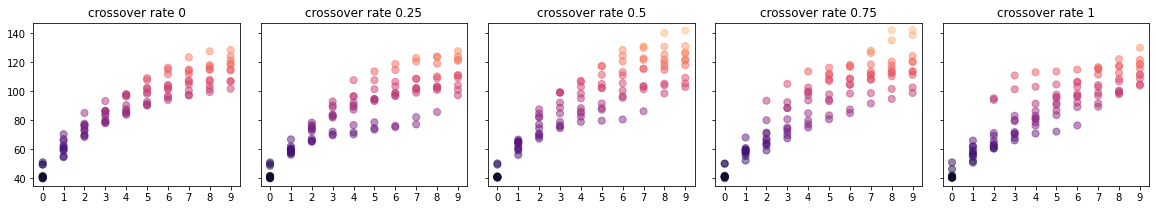

In [8]:
fig = plt.figure(figsize=(20,3))
gs = fig.add_gridspec(1, 6, hspace=0, wspace=0.1)
axs = gs.subplots(sharey=True)

for l,s in enumerate(crate):
    axs[l].set_title('crossover rate '+s)
    axs[l].set_xticks(np.arange(10))
    for i in range(10):
        df = pd.read_json('experiments/no_regeneration/no_regeneration_cross_'+s+'_results.json').to_numpy()
        axs[l].scatter(np.ones((10))*i, df[:,i], s=50, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
plt.show()

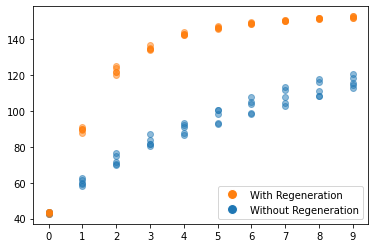

In [44]:
from bokeh.palettes import Category10
from matplotlib.lines import Line2D
fig = plt.figure(figsize=(6,4))
gs = fig.add_gridspec(1, 1, hspace=0, wspace=0.1)
axs = gs.subplots(sharey=True)

axs.set_xticks(np.arange(10))
for l,s in enumerate(crate):
    df = pd.read_json('experiments/no_regeneration/no_regeneration_cross_'+s+'_results.json').to_numpy()
    for i in range(10):
        axs.scatter(i, df[:,i].mean(), alpha=0.5, c=Category10[10][0])
for l,s in enumerate(crate):
    df = pd.read_json('experiments/cross_rate/cross_rate_'+s+'_results.json').to_numpy()
    for i in range(10):
        axs.scatter(i, df[:,i].mean(), alpha=0.5, c=Category10[10][1])
custom_lines = [Line2D([0], [0], marker='o', color='w',markerfacecolor=Category10[10][1], markersize=10),
                Line2D([0], [0], marker='o', color='w',markerfacecolor=Category10[10][0], markersize=10)]

plt.legend(custom_lines, ['With Regeneration', 'Without Regeneration'], loc='lower right')
plt.show()